## Support Vector Machine

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("iris.csv")
df

,Id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


### Using LabelEncoder to change the target variables from alpha to numerical type

In [3]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Target"] = LE.fit_transform(df["Species"])

In [4]:
df.head()

,Id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Target
0,1,5.1,3.5,1.4,0.2,setosa,0
1,2,4.9,3.0,1.4,0.2,setosa,0
2,3,4.7,3.2,1.3,0.2,setosa,0
3,4,4.6,3.1,1.5,0.2,setosa,0
4,5,5.0,3.6,1.4,0.2,setosa,0


In [37]:
zero = df[:50]
one = df[50:100]
two = df[100:]

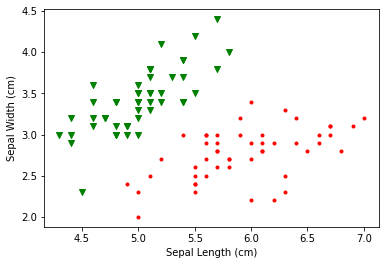

In [7]:
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.scatter(zero["sepal length (cm)"], zero["sepal width (cm)"],color='g',marker = "v")
plt.scatter(one["sepal length (cm)"], one["sepal width (cm)"],color='r',marker = ".")
#plt.scatter(two["sepal length (cm)"], two["sepal width (cm)"],color='b',marker = "o")

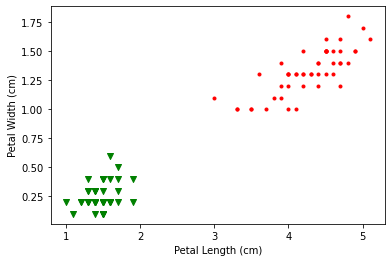

In [8]:
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.scatter(zero["petal length (cm)"], zero["petal width (cm)"],color='g',marker = "v")
plt.scatter(one["petal length (cm)"], one["petal width (cm)"],color='r',marker = ".")
#plt.scatter(two["PetalLengthCm"], two["PetalWidthCm"],color='b',marker = "o")

### Test Train Split

In [41]:
from sklearn.model_selection import train_test_split

x = df.drop(["Target","Species","Id"], axis = 'columns')
y = df.Target

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2) 

In [43]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

120
120
30
30


## Tuning parameters

### Default

In [22]:
from sklearn.svm import SVC

model = SVC()

In [44]:
model.fit(x_train, y_train)

SVC()

In [45]:
model.score(x_test, y_test)

0.9666666666666667

In [46]:
model.predict([[4.8, 3.0, 1.5, 0.3]])

/home/cigar/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [54]:
y_pred = model.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]


0.9666666666666667

### Using Regularization

In [47]:
r_model = SVC(C = 10)

r_model.fit(x_train, y_train)

r_model.score(x_test, y_test)

0.9666666666666667

In [17]:
r_model.predict([[4.8, 3.0, 1.5, 0.3]])

/home/cigar/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

### Using Gamma

In [48]:
g_model = SVC(gamma = 600)

g_model.fit(x_train, y_train)

g_model.score(x_test, y_test)

0.26666666666666666

In [57]:
yg_pred = g_model.predict(x_test)

In [49]:
g_model.predict([[4.8, 3.0, 1.5, 0.3]])

/home/cigar/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, yg_pred)
print(cm)
accuracy_score(y_test,yg_pred)

[[ 7  0  0]
 [11  0  0]
 [11  0  1]]


0.26666666666666666

## Kernal

In [50]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(x_train, y_train)

SVC(kernel='linear')

In [51]:
model_linear_kernal.score(x_test, y_test)

0.9666666666666667

## SVM with nonlinear decision boundary

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


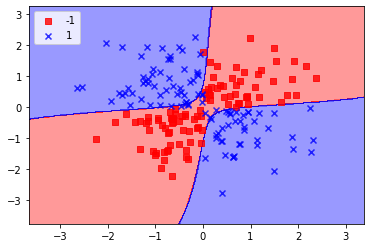

In [69]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())


   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)

   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

# draw decision boundary
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()
